The following example is output from a 100 ps run of a methyl chloride molecule and a chloride anion at 300 K. Interatomic interactions are described at the semi-empirical PM6 level of theory, and we use CP2K as engine. Using PLUMED, we track two collective variables (CVs) of interest:
* The bound C-Cl distance $d_1$
* The unbound C-Cl distance $d_2$

In principle, these two CVs allow us to unambiguously distinguish the two (symmetric) chemical states of this system. So, we're going to take a look at the (2D) histogram $H(d_1,d_2)$ defined by these CVs. We expect it to be symmetric, exhibiting two regions of high density.

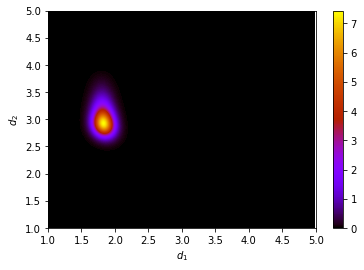

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# In gnuplot you can simply use pm3d: way easier!
H=np.loadtxt("histo",usecols=[0,1,2],skiprows=10,unpack=True)
d1=d2=np.arange(1,5.01,0.01)
z=griddata((H[0],H[1]),H[2],(d1[None,:], d2[:,None]), method='cubic')
plt.imshow(z,origin="lower",vmin=0,cmap="gnuplot",aspect="auto",extent=[1,5,1,5])
plt.xlabel("$d_1$")
plt.ylabel("$d_2$")
plt.colorbar()
plt.show()

So, it seems that this system actually only has one state. What went wrong? 

Let's plot the trajectory of one of the CVs ($d_1$):

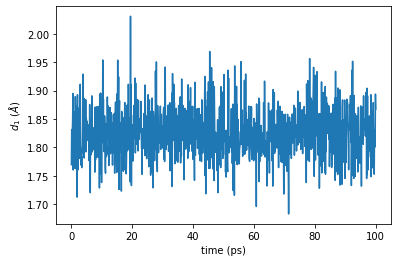

In [2]:
time = np.loadtxt('colvar', skiprows=1, usecols=0)
d1 = np.loadtxt('colvar', skiprows=1, usecols=1)
d2 = np.loadtxt('colvar', skiprows=1, usecols=2)
plt.plot(time,d1)
plt.xlabel("time (ps)")
plt.ylabel("$d_1$ ($\AA$)")
plt.show()

As you can see, the $d_1$ bond remains intact during the whole simulation. In order to sample the other chemical state, the cloride ion has to do a nucleophilic attack at the carbon center and displace the bound atom (an S<sub>N</sub>2 reaction).

If we plot both CVs, we'll see that the free anion never comes close to attacking the carbon atom: the distance $d_2$ remains large, and the bond $d_1$ is never in danger of being broken.

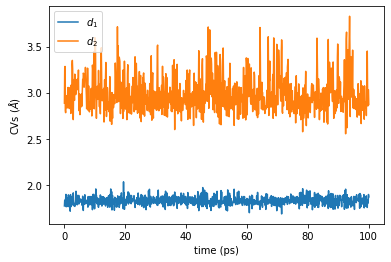

In [3]:
plt.plot(time,d1,label = "$d_1$")
plt.plot(time,d2,label = "$d_2$")
plt.xlabel("time (ps)")
plt.ylabel("CVs ($\AA$)")
plt.legend()
plt.show()

While 100 ps is not a particularly long simulation, it is already at the limit of what we can routinely achieve at higher levels of theory (DFT and beyond). So we'll need 